# Introduction to Simple Linear Regression-2

## Learning Objectives and outcomes

- $R^{2}$ - score for a linear regression

- Discussion of statsmodel output for a linear regression.

- Assumptions of linear regression

- Interpretting significance and p_values.





In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data to a dataframe
data = pd.read_csv('data/ISLR-Auto/Advertising.csv', index_col =0 )[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


Note that TV is dollars in thousands and sales are in thousands of units too.

<Figure size 432x288 with 0 Axes>

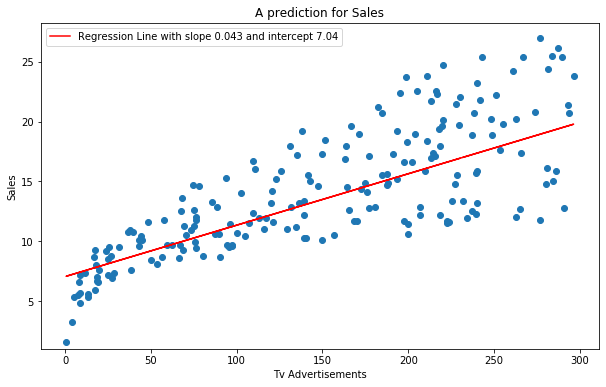

In [84]:
X = data.TV.values
y = data.Sales.values

## draw_line is homemade function for fitting a line to our dataset.

## It takes X, y, intercept value and slope value
## plots data from X,y and plots a line with the slope "intercept" and "slope"

## you can change slope and intercept to understand their effect on the line.
%run draw_line.py

draw_line(X, y, intercept = 7.04, slope= 0.043, fig_size= (10,6))

__Q: How to find 'best' line?__


Making sum of __errors__ minimum

<img src="errors.png" cap="Transformed dataset"  width='500'/>

## Using Statsmodels.api  - Making Predictions

In [47]:
import statsmodels.api as sm

X = data.TV.values

Xconst = sm.add_constant(X)

y = data.Sales

In [48]:
## we first construct our model
model = sm.OLS(y, Xconst, hasconst= True)

## by fitting we learn 'best' coefficients for intercept and slope
fitted_model = model.fit()


## with summary method we can see all the relevant statistics.
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        12:41:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Suppose our company wants to invest $230K in TV ads in a city, how much sales would you expect on average for this city?

In [86]:
fitted_model.predict([1, 230])

array([17.96602085])

In [98]:
intercept = fitted_model.params[0]

slope = fitted_model.params[1]

Note that this prediction is noting but 

$$ \text{Sales} = 0.0475 \times 230 + 7.0326 $$

In [97]:
our_prediction = slope * 230 + intercept
our_prediction

17.96602084872224

## Understanding $R^{2}$

Note that if we want to predict sales naively a good choice could be the means sales.

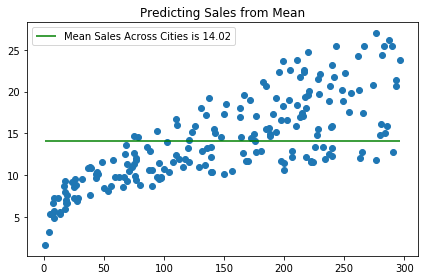

In [60]:
plt.scatter(X,y)

plt.hlines(y = y.mean(),  xmin = X.min(), 
           xmax = X.max(), 
           label = 'Mean Sales Across Cities is %.2f'%y.mean(), color = 'green')

plt.title('Predicting Sales from Mean')

plt.legend()

plt.tight_layout()

But as we can see this is not explaining what is going on in the data very well. We will call the amount of errors in this case as Total Sum of Squares.


$$ \text{Total Sum of Squares} = \sum\limits_{i=1}^{200} (y_{i} - \bar{y})^{2} $$

In [69]:
y_bar = y.mean()

TSS = sum((y - y_bar)**2)

print(TSS)

5417.148749999998


But after we fit a linear regression line we have a better fit than just "mean"

In [73]:
y_pred = fitted_model.predict(Xconst)

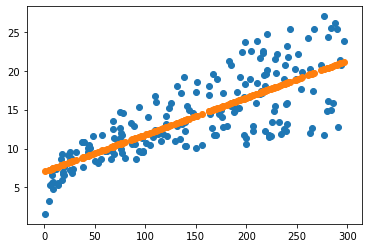

In [74]:
# this plots the actual data.
plt.scatter(X,y)

# this plots the 'best' line
plt.scatter(X, y_pred)

As we can see this line is also not 'perfect' from prediction point of view. Let's see how much is the total amount of error this time.

$$ \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{200} (y_i - \text{y_pred}_{i})^{2}$$

In [76]:
residuals = y - y_pred

## We will be 
RSS = sum(residuals**2)

RSS

2102.5305831313503

In [79]:
print('Total Squared Sum  is %.3f '%TSS)
print('Residual Squared Sum is %.3f'%RSS)

Total Squared Sum  is 5417.149 
Residual Squared Sum is 2102.531


$R^{2}$ measurement is just their ratio:

 $$ R^{2} = \frac{TSS - RSS}{TSS} $$

In [82]:
R_squared = (TSS - RSS)/TSS

R_squared

0.611875050850071

## Model and Assumptions in more details

* Assume $\mbox{Sales} \approx \mbox{TV}$  linearly.

* There is an initial value (baseline) of the Sales. 

* Data might not be fit on a line but the errors are random.

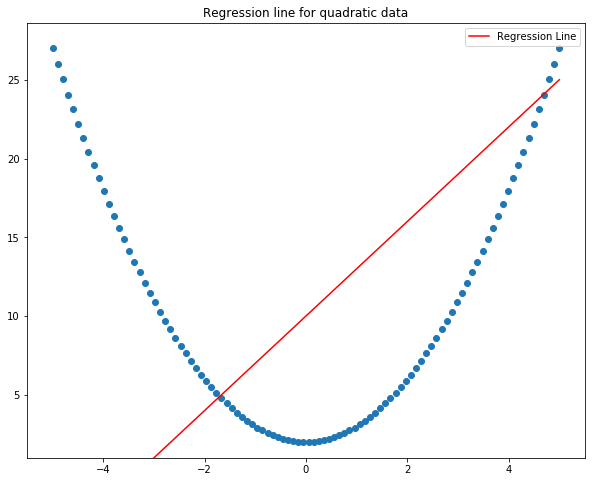

In [26]:
## Sometimes linearity assumption is too strict

expr_x = np.linspace(-5, 5,100)
y = expr_x**2 + 2
draw_line(expr_x, y, intercept= 10, slope = 3,
          xlabel= '',
          ylabel = '', 
          title = 'Regression line for quadratic data')

In [103]:
X = np.linspace(-1,1, 1000)

In [104]:
errors = np.random.normal(loc = 0, scale = 1,size=  1000)

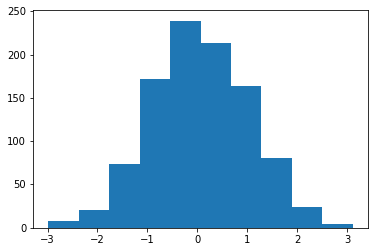

In [105]:
plt.hist(errors)
plt.show()

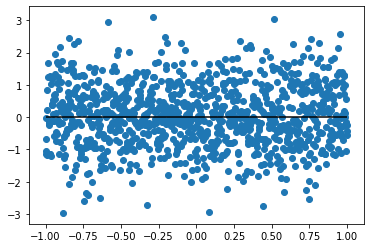

In [106]:
plt.scatter(X, errors)
plt.hlines(y= 0, xmin = -1, xmax = 1)
plt.show()

In [95]:
X = data.TV.values
y = data.Sales.values

In [96]:
X.shape

(200,)

In [97]:
X = X.reshape(-1, 1)

X.shape

(200, 1)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

In [100]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# best slope value slope
m = lr.coef_

In [103]:
## best intercept value
b = lr.intercept_

In [105]:
y_pred = m*X + b

Text(0, 0.5, 'Sales in thosands of units')

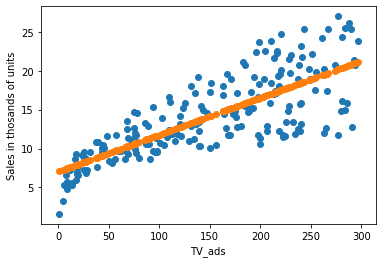

In [112]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

plt.xlabel('TV_ads')

plt.ylabel('Sales in thosands of units')

## P_values and Significance

- To clarify the difference between population parameters and the estimates from data we will work with simulated data in this section.

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
# Here we will work with a toy case
# note that y~ 3X + 5 so we know population parameters in this case. 
# irr_error is random error due to some measurement errors.

X = np.random.uniform(low = 0, high = 10, size = 100)
irr_error = np.random.normal(loc= 0, scale = 1, size = 100)

y = 3*X + 5 + irr_error

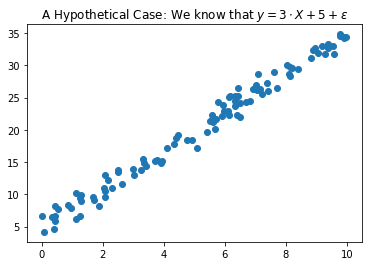

In [128]:
plt.scatter(X,y)
plt.title('A Hypothetical Case: We know that $y = 3 \cdot X + 5 + \epsilon$')
plt.show()

__Your Turn!__ Use sklearn to fit 100 linear model for the data X, y above. Don't forget to add random error each time. The idea is each time we sample from a population we will have some variation inevitably.

In [130]:
# %load -r 35-48 supplement.py


Now let's look at distributions of $\hat{b}_{0}$ and $\hat{b}_{1}$:

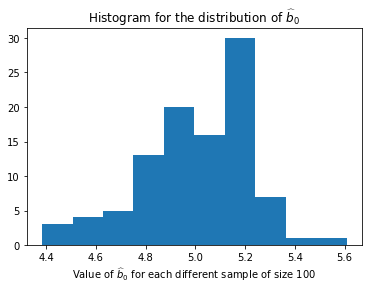

In [120]:
plt.hist(coef_list_b0)
plt.title("Histogram for the distribution of $\widehat{b}_{0}$")
plt.xlabel("Value of $\widehat{b}_{0}$ for each different sample of size 100")
plt.show()

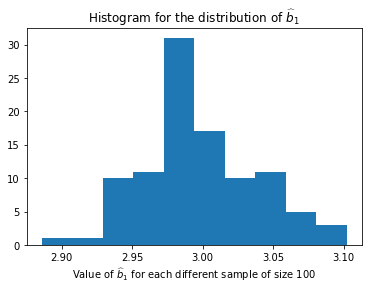

In [121]:
plt.hist(coef_list_b1)
plt.title("Histogram for the distribution of $\widehat{b}_{1}$")
plt.xlabel("Value of $\widehat{b}_{1}$ for each different sample of size 100")
plt.show()

[Exit Ticket For Linear Regression](https://forms.gle/5qSxnwjTf3p2fDfh8)

## Further Reading <a name='further_reading'></a>

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf